### Question 3.11
A pharmacologist employed a first order simple linear regression model to study the relationship between the concentration of a drug in plasma \(Y\) and the log-dose of the drug \(X\). 

In [68]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.anova import anova_lm

In [69]:
# Load data
CH03PR11 = pd.read_excel("C:\\Users\\kwame\\Downloads\\CH03PR11.xlsx")
print(CH03PR11)

   X    e
0 -1  0.5
1  0  2.1
2  1 -3.4
3 -1  0.3
4  0 -1.7
5  1  4.2
6 -1 -0.6
7  0  2.6
8  1 -4.0


#### a. The residual versus \(X\) plot shows that the variance is increasing as \(X\) increases, so the constant variance assumption is violated.

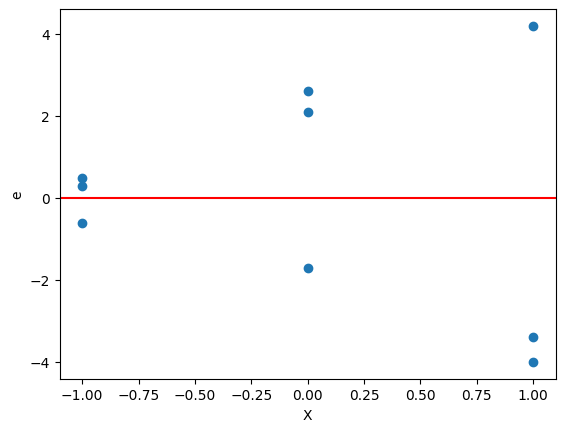

In [70]:
# Create a scatterplot
plt.scatter(CH03PR11['X'], CH03PR11['e'])

# Add a horizontal reference line at y = 0
plt.axhline(y=0, color='red')  # You can change the line color if desired

# Label the axes (optional)
plt.xlabel('X')
plt.ylabel('e')

# Show the plot
plt.show()

#### b. The test statistic \(\chi^2_{BP} = 3.7\), which is not bigger than the \(\chi^2\) critical value, 3.84, so we fail to reject \(H_0\). 

In [71]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats

# Assuming 'e' and 'X' are columns in your DataFrame
# Replace 'e' and 'X' with your actual column names if different

# Fit a linear regression model
X = sm.add_constant(CH03PR11['X'])
y_squared = CH03PR11['e'] ** 2
model = sm.OLS(y_squared, X).fit()

# Calculate the sum of squares regression (SSR) and sum of squares error (SSE)
SSR = model.ess
SSE = model.ssr

# Calculate the degrees of freedom for SSR and SSE
df_SSR = 1  # Number of predictors (X)
df_SSE = len(CH03PR11) - 2  # Residual degrees of freedom

# Calculate the mean squares for SSR and SSE
MSR = SSR / df_SSR
MSE = SSE / df_SSE

# Calculate the F-statistic
F_statistic = MSR / MSE

# Calculate the p-value for the F-statistic
p_value = 1 - stats.f.cdf(F_statistic, df_SSR, df_SSE)

# Print the ANOVA table
print("SSR:", SSR)
print("df_SSR:", df_SSR)
print("MSR:", MSR)
print("SSE:", SSE)
print("df_SSE:", df_SSE)
print("MSE:", MSE)
print("F-statistic:", F_statistic)
print("p-value:", p_value)


# Calculate the critical value from the F-distribution
alpha = 0.05
critical_value = stats.f.ppf(1 - alpha, df_SSR, df_SSE)

# Check if F-statistic is greater than the critical value
result = F_statistic > critical_value

# Check if F-statistic is greater than the critical value
result = F_statistic > critical_value

print(result)


SSR: 330.0416666666667
df_SSR: 1
MSR: 330.0416666666667
SSE: 44.9926888888889
df_SSE: 7
MSE: 6.4275269841269855
F-statistic: 51.34815730555729
p-value: 0.00018282631736687982
True
